In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import metpy.calc as mcalc
from metpy.units import units
import cartopy.feature as cfeature
import japanize_matplotlib
from matplotlib.transforms import offset_copy

In [2]:
st_master=pd.read_excel("../config/radio_st_list.xlsx")

In [3]:
mlon=plt.MultipleLocator(10)
mlat=plt.MultipleLocator(10)

## 無地天気図

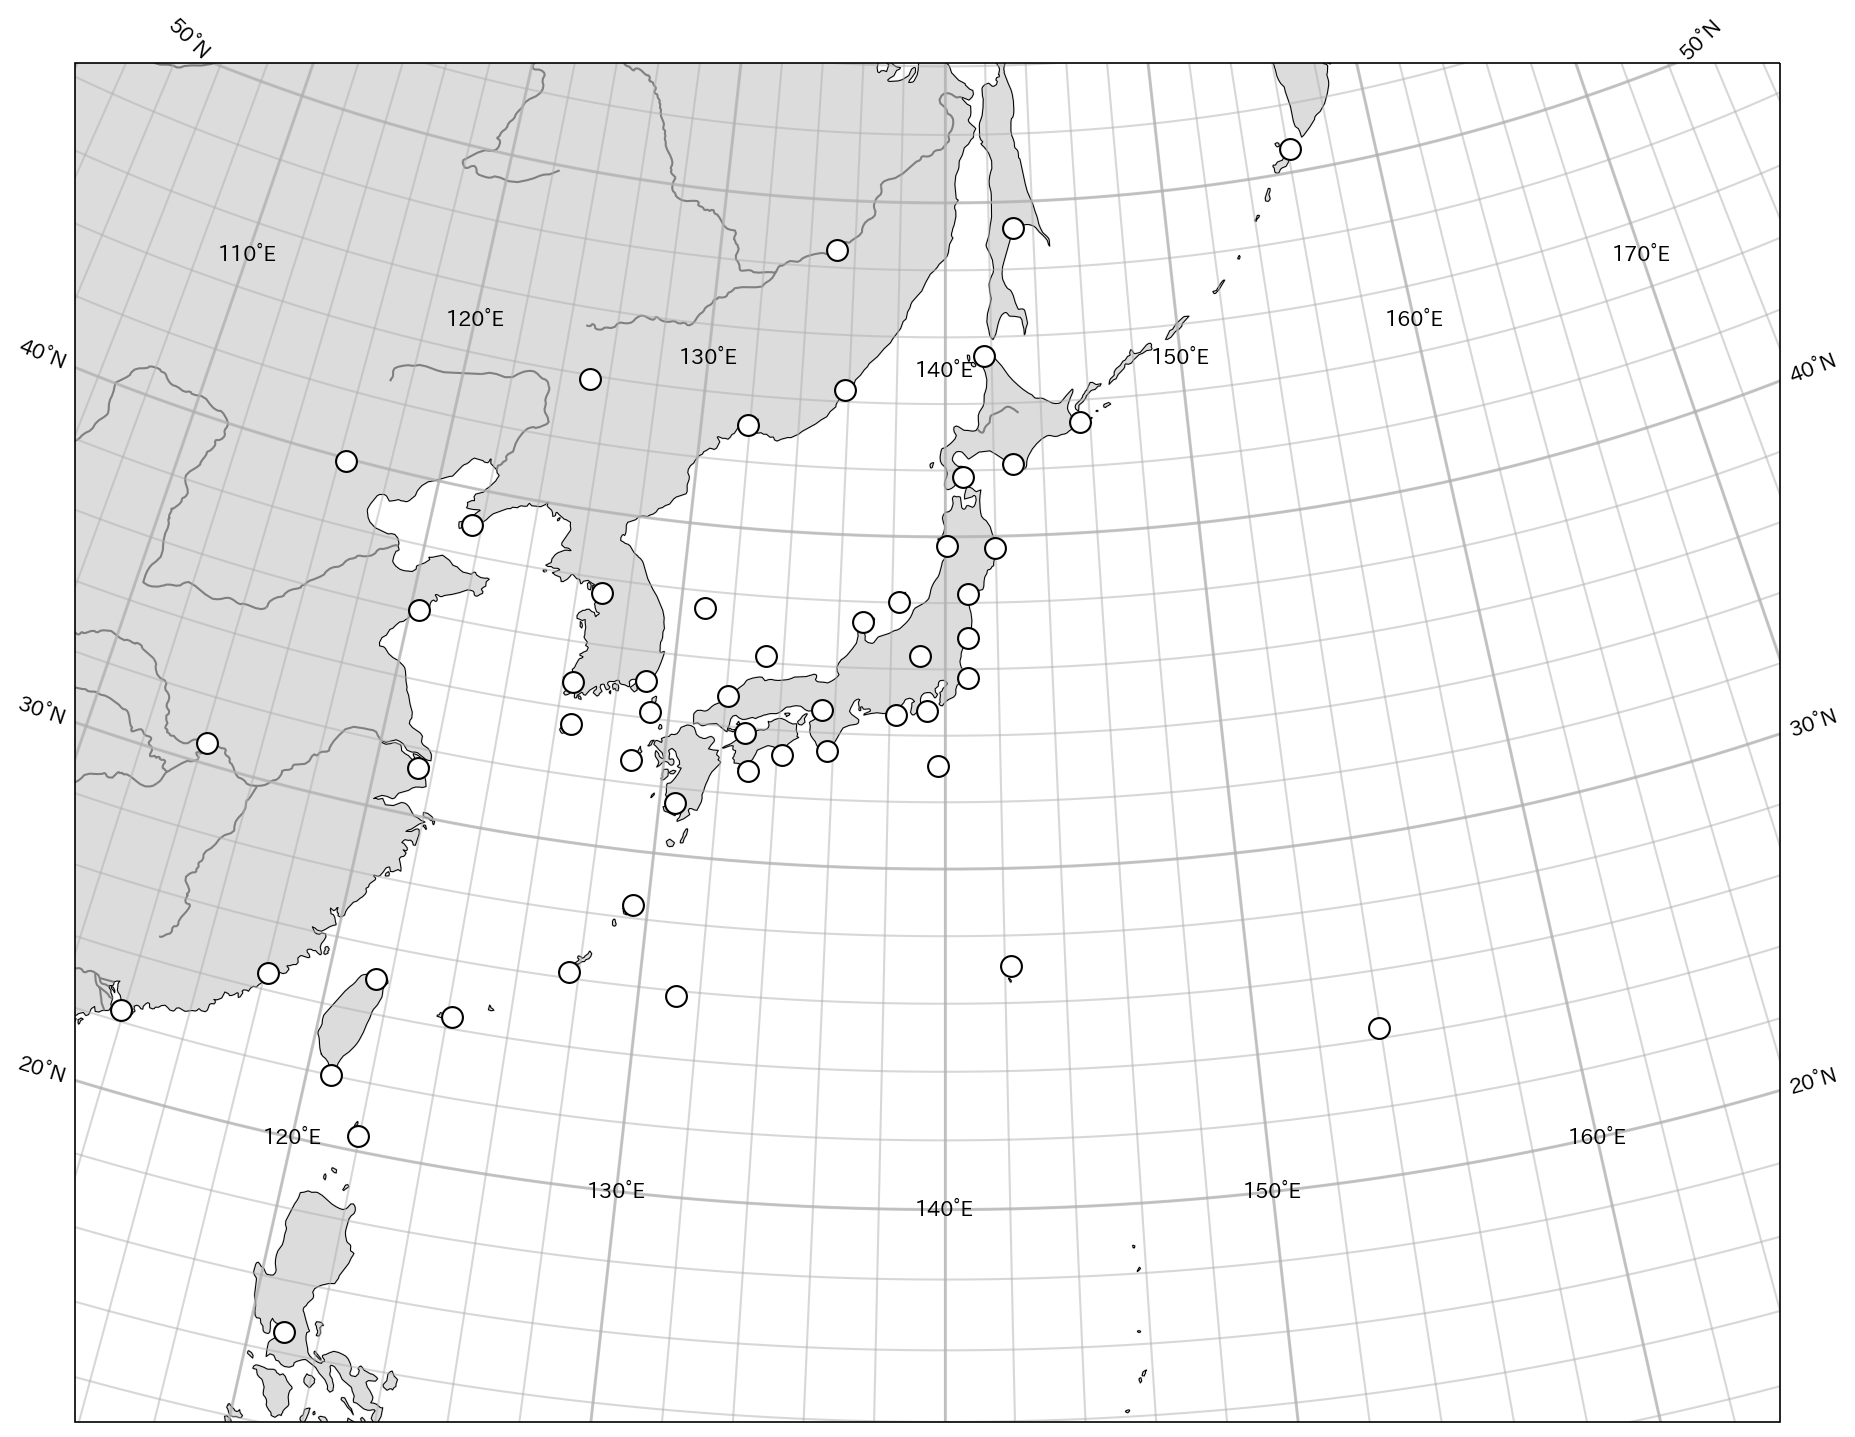

In [10]:
fig=plt.figure(figsize=(20,12),dpi=150)
ax=fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_longitude=140, central_latitude=30))
ax.coastlines(resolution="50m", linewidth=0.5)
gl_minor=ax.gridlines(draw_labels=False, xlocs=plt.MultipleLocator(2), ylocs=plt.MultipleLocator(2),alpha=0.5, linewidth=1)
gl=ax.gridlines(draw_labels=True,xlocs=mlon,ylocs=mlat, linewidth=1.5,alpha=0.6)
ax.set_extent([115,164,14,52],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor="gainsboro")
ax.add_feature(cfeature.RIVERS.with_scale("50m"),edgecolor="gray")

for lon,lat in zip(st_master["lon"], st_master["lat"]):
    ax.plot(lon,lat, marker="o", transform=ccrs.PlateCarree(), c="w", markeredgecolor="k",markersize=10)
fig.savefig("../map/blank_map.png", bbox_inches="tight")

## 初級者向け

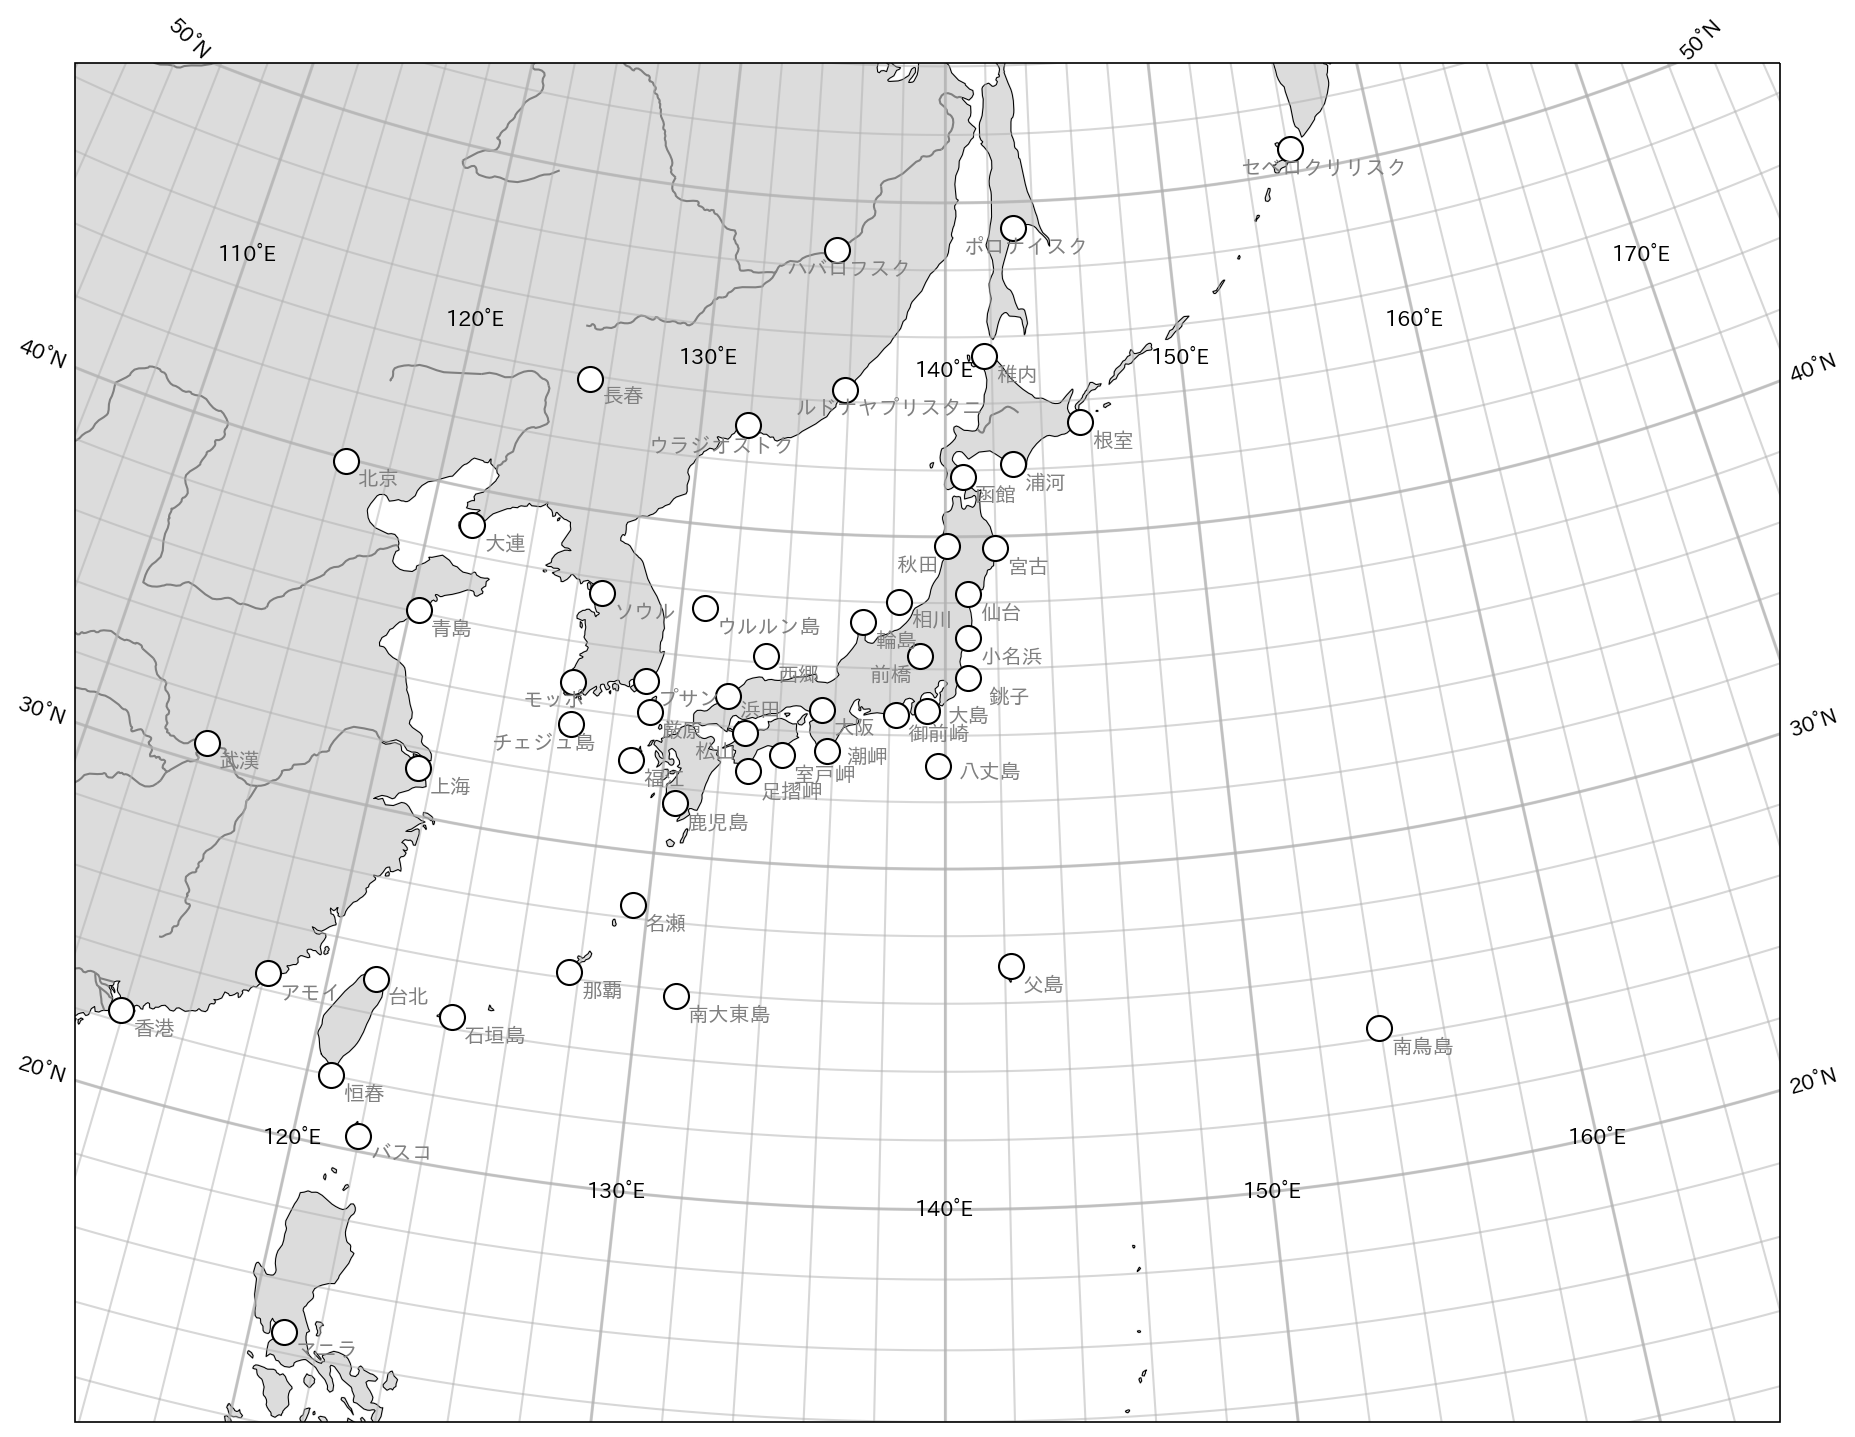

In [6]:

fig=plt.figure(figsize=(20,12),dpi=150)
ax=fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_longitude=140, central_latitude=30))
ax.coastlines(resolution="50m",linewidth=0.5)
gl_minor=ax.gridlines(draw_labels=False, xlocs=plt.MultipleLocator(2), ylocs=plt.MultipleLocator(2),alpha=0.5, linewidth=1)
gl=ax.gridlines(draw_labels=True,xlocs=mlon,ylocs=mlat, linewidth=1.5,alpha=0.6)
ax.set_extent([115,164,14,52],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor="gainsboro")
ax.add_feature(cfeature.RIVERS.with_scale("50m"),edgecolor="gray")

for lon,lat,st_name,x,y in zip(st_master["lon"], st_master["lat"],st_master["st_name"],st_master["x"], st_master["y"]):
    ax.plot(lon,lat, marker="o", transform=ccrs.PlateCarree(), c="w", markeredgecolor="k",markersize=12)
    text_transform=offset_copy(ccrs.Geodetic()._as_mpl_transform(ax),units="dots", x=x,y=y)
    ax.text(lon,lat, st_name, transform=text_transform,color="gray")
fig.savefig("../map/blank_map_with_label.png", bbox_inches="tight")

In [7]:
192/12

16.0

In [75]:
fig=plt.figure(figsize=(16,9),dpi=150, edgecolor="none")
ax=fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_longitude=140, central_latitude=30))
ax.coastlines(resolution="50m", linewidth=0.5, color="limegreen")
#gl_minor=ax.gridlines(draw_labels=False, xlocs=plt.MultipleLocator(2), ylocs=plt.MultipleLocator(2),alpha=0.5, linewidth=0.5)
gl=ax.gridlines(draw_labels=True,x_inline=True,y_inline=True,xlocs=mlon,ylocs=mlat, linewidth=0.5,alpha=0.6,color="limegreen")
gl.xlabel_style={"size":5,"color":"limegreen"}
gl.ylabel_style={"size":5,"color":"limegreen"}
ax.set_extent([90,195,10,60],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale("50m"),facecolor="palegreen")
ax.add_feature(cfeature.RIVERS.with_scale("50m"),edgecolor="skyblue",)
ax.add_feature(cfeature.LAKES.with_scale("50m"), facecolor="skyblue")
ax.add_feature(cfeature.OCEAN.with_scale("50m"), facecolor="lightskyblue")

for lon,lat in zip(st_master["lon"], st_master["lat"]):
    ax.plot(lon,lat, marker="o", transform=ccrs.PlateCarree(), c="w", markeredgecolor="k",markersize=5,markeredgewidth=0.5)
fig.savefig("../map/color_blank_map.png", bbox_inches="tight", edgecolor="none", pad_inches=0.0)
plt.close()